In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

## benchmarking for the basic document and efficient document

In [2]:
data = pd.read_csv('../benchMarkingResult.txt',
                   header=None,
                   sep='\t',
                   names=('iteration',
                          'basic_result',
                          'efficient_result'))

### Plot the Basic and Efficient data first

--------------------

Basic

In [3]:
x = data.iteration
y1 = data.basic_result
y2 = data.efficient_result

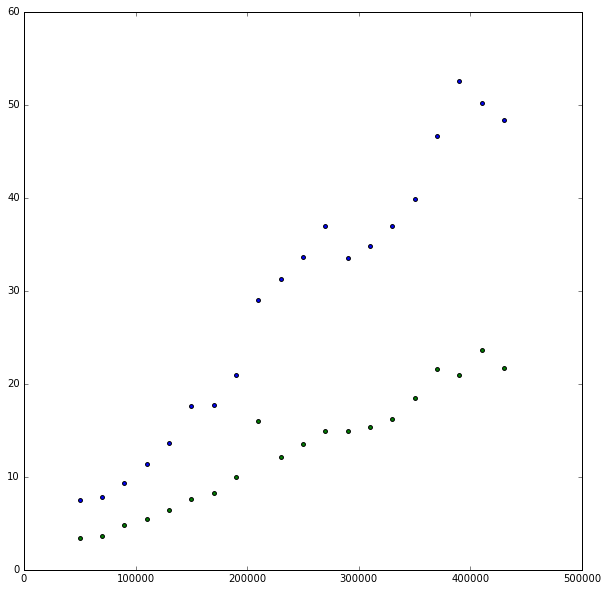

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y1, s=15)
ax.scatter(x, y2, s=15, c='g')

### do a linear regression for the 2 lines and evaluate the r-squared value

In [5]:
d1 = {'x':x, 'y_basic':y1}
d2 = {'x':x, 'y_efficient':y2}

In [6]:
mod1 = smf.ols(formula='y_basic ~ x - 1',
               data = d1).fit()

In [7]:
print mod1.summary()

                            OLS Regression Results                            
Dep. Variable:                y_basic   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2628.
Date:                Mon, 27 Feb 2017   Prob (F-statistic):           7.75e-22
Time:                        19:57:29   Log-Likelihood:                -48.575
No. Observations:                  20   AIC:                             99.15
Df Residuals:                      19   BIC:                             100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.0001   2.37e-06     51.269      0.0

In [8]:
mod2 = smf.ols(formula='y_efficient ~ x - 1', data=d2).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            y_efficient   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2163.
Date:                Mon, 27 Feb 2017   Prob (F-statistic):           4.87e-21
Time:                        19:57:29   Log-Likelihood:                -34.300
No. Observations:                  20   AIC:                             70.60
Df Residuals:                      19   BIC:                             71.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x           5.388e-05   1.16e-06     46.510      0.000      5.15e-05  5.63e-05
==============================================================================
Omnibus:                       21.719   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.717
Skew:                           1.952   Prob(JB):                     5.81e-07
Kurtosis:                       7.384   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### both r-squared look quite nice

## plot the resulting lines. I'm ignoring the cross-validation here

In [9]:
y_est_basic = mod1.predict(x)
y_est_effi = mod2.predict(x)

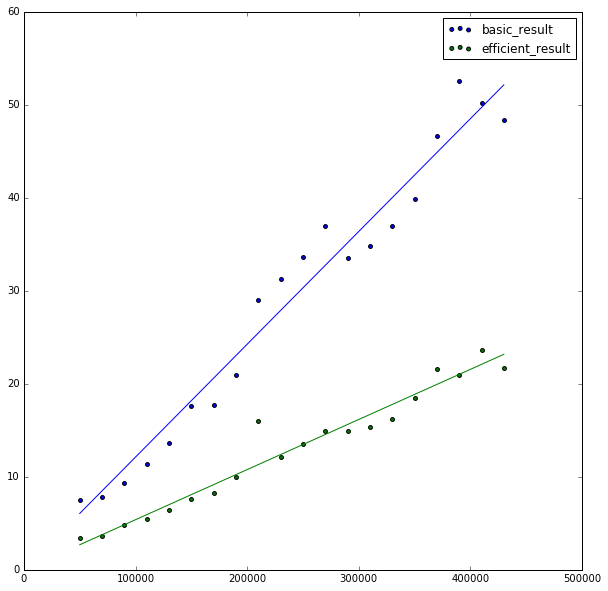

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y1, s=15)
ax.scatter(x, y2, s=15, c='g')
ax.plot(x, y_est_basic)
ax.plot(x, y_est_effi)
ax.legend()